In [0]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

**Define** **the** **question**

In [0]:
#here we define our research question which is
#To figure out how we can predict which individuals are most likely to have or use a bank account

**The metric for success**

In [0]:
#Perform univariate analysis using visualization
#perform bivariate analysis using visualization
#mutivariate analysis using multiple regression and reduction techniques in this case PCA
#Make reccommendation and comments on the findings

**The context**

In [0]:
#The countries in this study include uganda,kenya,rwanda,tanzania
#the refences are listed below
#FinAccess Kenya 2018. 
#Finscope Rwanda 2016
#Finscope Tanzania 2017
#Finscope Uganda 2018
#Dataset: http://bit.ly/FinancialDataset
#Variable Definitions: http://bit.ly/VariableDefinitions

**Experimental design**

In [0]:
#load the dataset
#clean the dataset by dealing with outliers, anomalies, and missing data within the dataset if any
#Plot univariate and bivariate summaries recording your observations
#Implement the solution by performing the respective analysis i.e. reduction, modeling
#Challenge your solution by providing insights on how you can make improvements

**The appropriateness of the available data to answer the given question**

In [0]:
#How is the dataset in regard to our research question
#Is the Data sufficient
#is it relevant 
#is the dataset reliable
#what about the external sources are they helpfull?


In [6]:
#we now load our dataset
url='http://bit.ly/FinancialDataset'
df = pd.read_csv(url)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#we now remane out dataset columns to make the column name uniform with the informaton captured in the data description
df = df.rename(columns={'The relathip with head':'relationship_with_head',
                         'Type of Location':'location_type',
                         'Cell Phone Access':'cellphone_access',
                         'Respondent Age':'age_of_respondent',
                         'Level of Educuation':'education_level',
                         'Type of Job':'job_type'})


In [8]:
df.head()

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
#we want to understand our dataset by checking the number of records,missing values and data types
df.shape#here we are checking the size of our dataset is the volume sufficient or its very little data to enable us gain useful insights?

(23524, 13)

In [10]:
#the correct data format is key and we check if our dataset mets this requirement by
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [11]:
#we establish whether there are missing values using the code below
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [12]:
#we the proceed to check our missing values by column and what quantity is missing for each variables
missing_data=df.isnull()# assign all mising values to a name missing_data
for column in missing_data.columns.values.tolist():#we use the for loops to avoid repitition of code for each variable
    print(column)
    print (missing_data[column].value_counts())
    print("")    

country
False    23510
True        14
Name: country, dtype: int64

year
False    23524
Name: year, dtype: int64

uniqueid
False    23524
Name: uniqueid, dtype: int64

Has a Bank account
False    23488
True        36
Name: Has a Bank account, dtype: int64

location_type
False    23509
True        15
Name: location_type, dtype: int64

cellphone_access
False    23513
True        11
Name: cellphone_access, dtype: int64

household_size
False    23496
True        28
Name: household_size, dtype: int64

age_of_respondent
False    23490
True        34
Name: age_of_respondent, dtype: int64

gender_of_respondent
False    23490
True        34
Name: gender_of_respondent, dtype: int64

relationship_with_head
False    23520
True         4
Name: relationship_with_head, dtype: int64

marital_status
False    23492
True        32
Name: marital_status, dtype: int64

education_level
False    23495
True        29
Name: education_level, dtype: int64

job_type
False    23494
True        30
Name: job_type, dty

In [0]:
#we now fill in missing values with the respective modes of each attribute in the columns enlisted
categorical_columns = ['country','gender_of_respondent', 'relationship_with_head', 'marital_status','location_type','cellphone_access','education_level','job_type']
for column in categorical_columns:# we do this to avoid repiting the same procedure for each column.
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [0]:
#we replace NaN value with the most common house_hold size
df['household_size'] = df['household_size'].fillna(df['household_size'].mode().iloc[0])

In [0]:
#find the mode in the column age_of_respondent and use it to replace the nan values.
df['age_of_respondent'] = df['age_of_respondent'].fillna(df['age_of_respondent'].mode().iloc[0])

In [0]:
#there is an anomaly in the education level
df['education_level'].unique()
df['education_level']=df['education_level']

In [0]:
#we replace NaN value with the most frequent value for Has a Bank account
df['Has a Bank account'] = df['Has a Bank account'].fillna(df['Has a Bank account'].mode().iloc[0])

In [18]:
#check whether we successfully treated the missing values
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [19]:
#we check whether our variable data types are as expected
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#all our ariable data types are fine except for house hold size so to correct this we do the conversion
df['household_size']=df['household_size'].astype("float")

In [21]:
#we check if this is converted
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#we now have all missing values treated, variable data types in the correct format

In [0]:
#we delete the columns we may not need like the uniqueid,year
df=df.drop(['uniqueid','year'],axis=1)


In [24]:
df.head(2)

,country,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


**UNIVARIATE** **ANALYSIS**

In [0]:
#we perform a univariate analysis which majorly highlghts the distribution of data variables. 

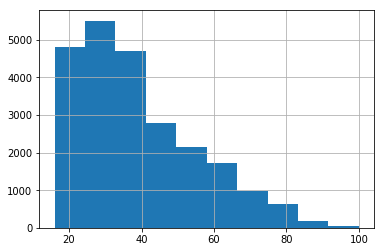

In [26]:
df['age_of_respondent'].hist()
#in the below histogram we observe some positive skewness.
#we can say that those aged between 20 and 50 account for most of the respondents by age.

In [27]:
#getting the descriptive statistics
df['age_of_respondent'].describe()

count    23524.000000
mean        38.791575
std         16.511441
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

In [0]:
#from the above statistics we can infer that since the mean and the median(50%quartile) are slightly far from each other there could be 
#a presence of relatively many outliers

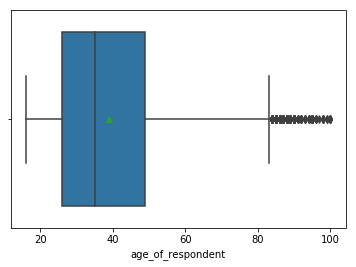

In [29]:
#we visualize to check if truely there are outliers using the box plot and yes there are outliers!as in the box plot below.
sns.boxplot(df['age_of_respondent'],showmeans=True)

In [30]:
#we proceed to perform a univariate analysis of the household_size
df['household_size'].describe()

count    23524.000000
mean         3.679816
std          2.279314
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

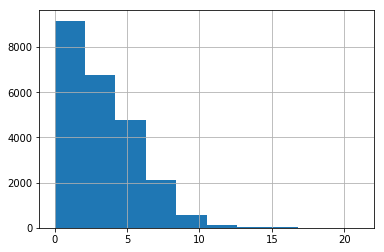

In [31]:
df['household_size'].hist()
#in the histogram below we observe positive skewness
#respondents of household_size 5 and below account for most of the respondents going by household size

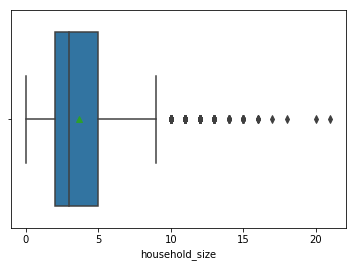

In [32]:
#we see that the diference between the mean and the median is small indicating the presence of outliers thouhg not too many
#this comes out clearly given the visualization below
sns.boxplot(df['household_size'],showmeans=True)

In [33]:
#we check for distinct values in the column
df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

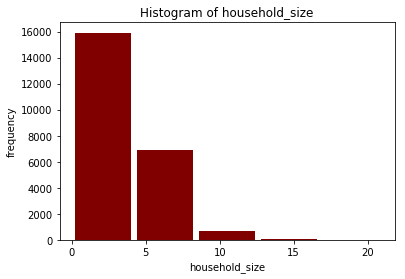

In [34]:
#we still see that the trend holds ie household_size of less than 5 account for most of the respondents in the survey.
household_size = df['household_size']

plt.hist(household_size, bins=5, histtype='bar', rwidth=0.9, color='maroon')
plt.xlabel('household_size')
plt.ylabel('frequency')
plt.title('Histogram of household_size')
plt.show()

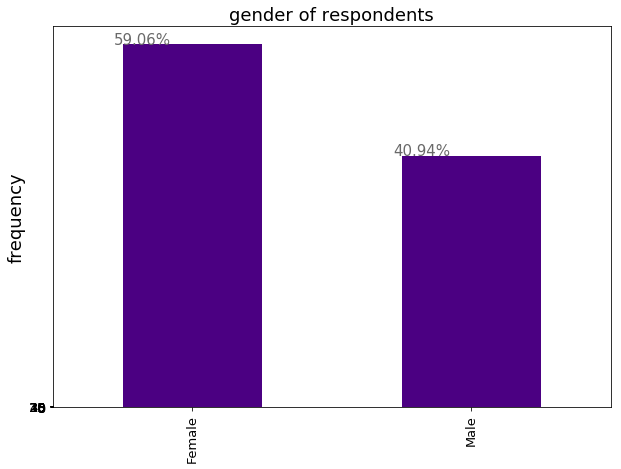

In [35]:
#we now use a bargraph since the attributes are categorical in nature.
#from the below plot we see that in regard to gender majority of the respondents were women at a percentage of 59.06%.
#we could attribute this to the fact that since it was a household survey more females were found at home compared to males
#not necessarily that it could point to more females holding accounts than men.but it could be an interesting variable to investigate
#but this helps us to understand that of the respondents by gender women accounted for 59.06%
ax = df['gender_of_respondent'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("gender of respondents", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20,25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

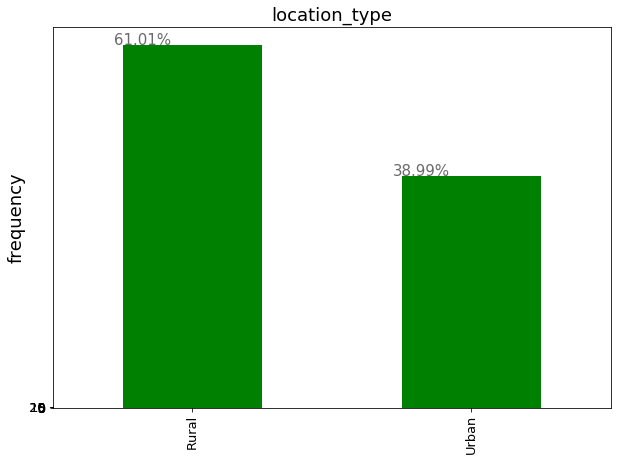

In [36]:
#from the below grapg we see that most o the respondents were drawn from rural areas and account for 61% of the respodents by
#location.typically banks are widespread across the countries and location of an individual maynot necessarily be a strong pointer to
#an individual having an account or not.  may thereore not necessarily include it in my model but it paints a picture of the distribution 
#of respondents by location type
ax = df['location_type'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("location_type", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

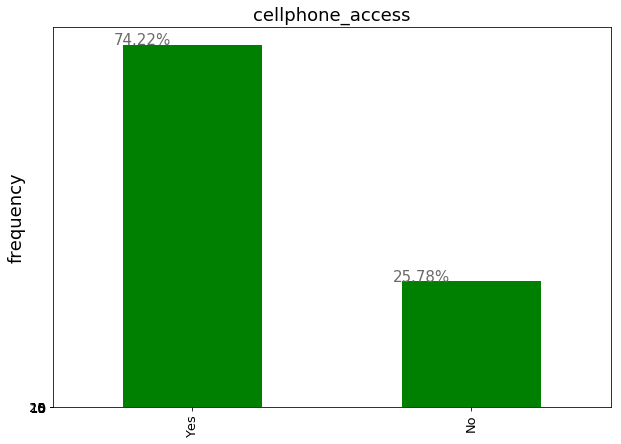

In [37]:
#fom the plots below 74.22% of the respondents have access to cell phones.
#with the development of ict this looks an interesting variable to include in my model
#growth of mobile money across the countries included in the study add strength to this variable as an interesting one to 
#consider in the model.
ax = df['cellphone_access'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="green", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("cellphone_access", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

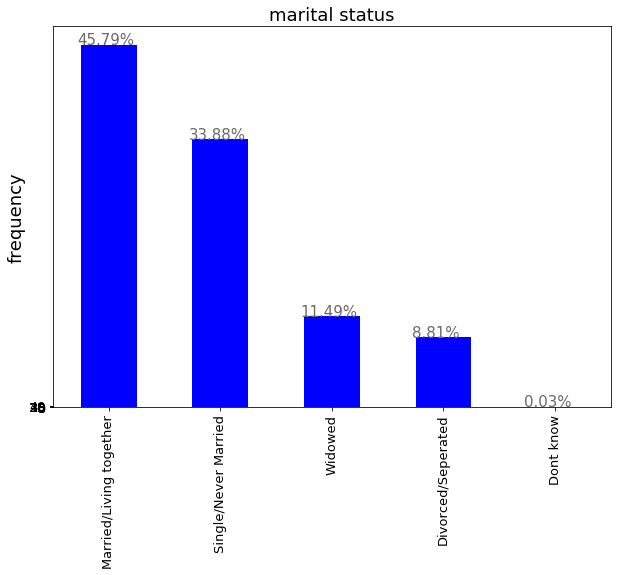

In [38]:
#from the plots those married accounted for 45.79% of the respondents by marital status.
#other groups in this category have also sufficiently contributed to this survey
#its an interesting factoe and on the groung it clearly is a  contributing factor to having or not having an account
#
ax = df['marital_status'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("marital status", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20,25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

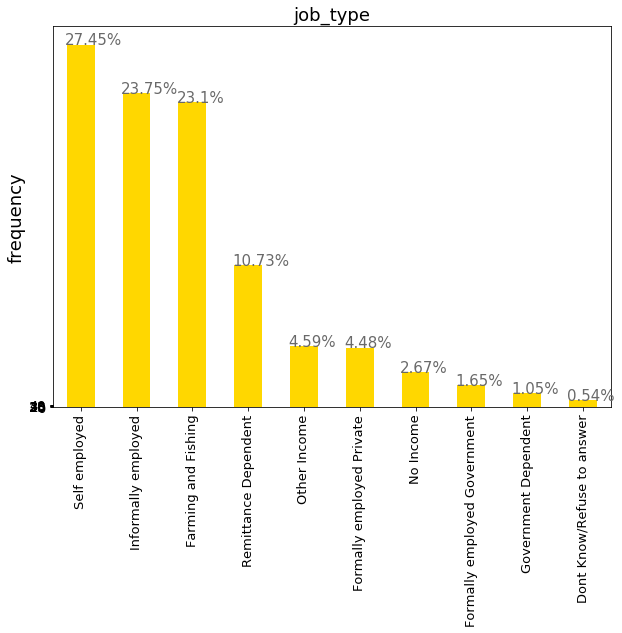

In [39]:
#from the plotted graphs we see that the respondents according to job_type self employed,informally employed and fish farming 
#accounted for the greatest percentage. in this survey it looks an interesting variable to investigate
ax = df['job_type'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="gold", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("job_type", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20,25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

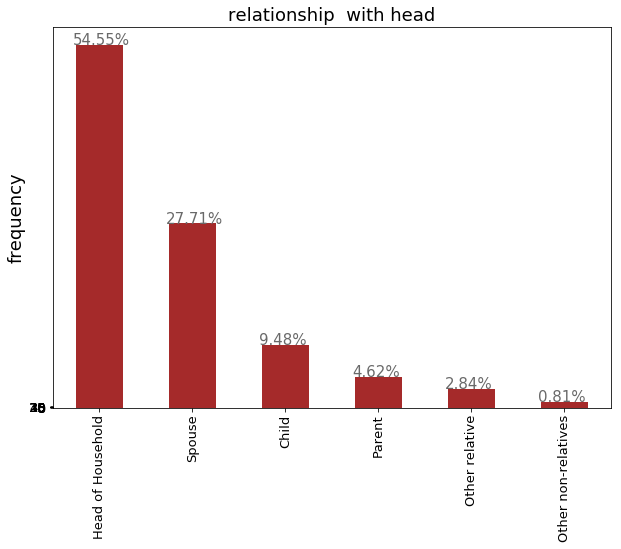

In [40]:
#heads of households accounted for the biggest percentage of respondents in this category.
#from te survey of the three countries this variable does not appear key to pointing whether one can have an account or not.
#rom the plots however we are able to understand the distribution of the respondents in this category with non relatives forming the smallest
#percentage of respondents.
ax = df['relationship_with_head'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="brown", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("relationship  with head", fontsize=18)
ax.set_ylabel("frequency", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20,25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

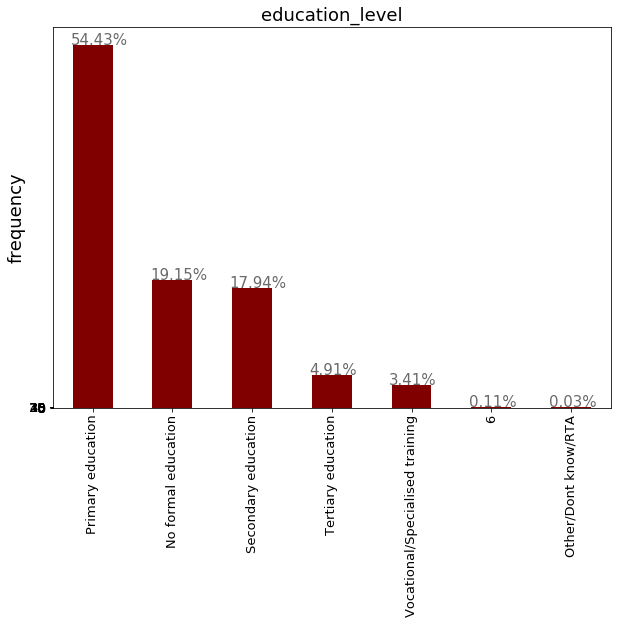

In [41]:
#this variable is highly correlated to an individual having an account or not and would obviously be factored in while creatint the model
#indiviiduals who have attained education upto primary level are the biggest portion of the respondents at 54.55%
ax = df['education_level'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="maroon", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("education_level", fontsize=18)#for the title of the graph
ax.set_ylabel("frequency", fontsize=18);#
ax.set_yticks([0, 5, 10, 15, 20,25, 30, 35, 40])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

BIVARIATE ANALYSIS

In [0]:
#we want to check for the distribution od variables and how they relate to one another . we shall also be establishing
#the strength of relationship if there exists

<Figure size 576x432 with 0 Axes>

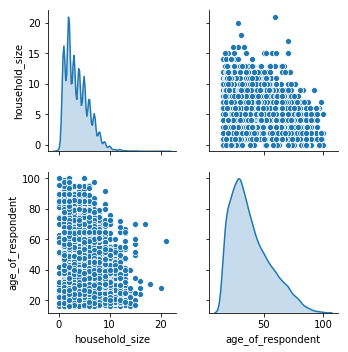

In [43]:

plt.figure(figsize=(8, 6))

sns.pairplot(df, diag_kind='kde')

In [0]:
#in the above plots we see no relationship between the two variables at all

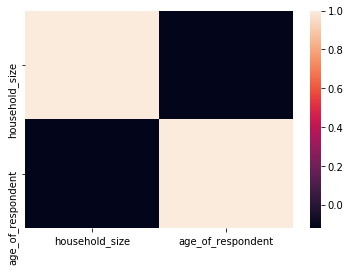

In [45]:
sns.heatmap(df.corr())
#the black shades confirm that there is completely no relationship between the two variables

Distributions of observations within categories

Text(0.5, 1.0, 'education level vs age of respondent')

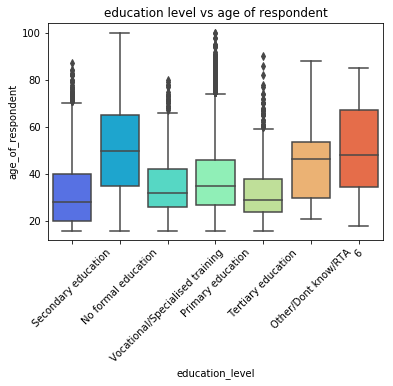

In [46]:
#we can use this to visualize how our observations are distributed within the various categories.
#we can say that the ages of the respondents in the category of educ level those with no formal education were more and older compared to the rest

sns.boxplot(x='education_level',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('education level vs age of respondent')


Text(0.5, 1.0, 'job_type vs age of respondent')

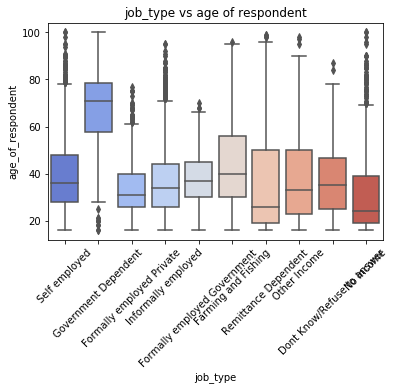

In [47]:
sns.boxplot(x='job_type',y='age_of_respondent',data=df,palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('job_type vs age of respondent')

Text(0.5, 1.0, 'gender_of_respondent vs age of respondent')

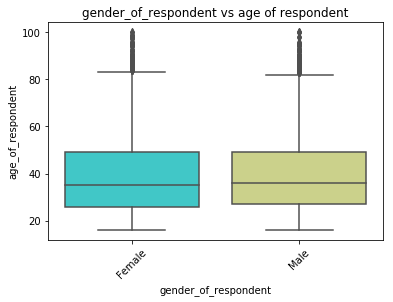

In [48]:
#the plot below suggests that the ages of the respondents whether male or female are around the same bracket
sns.boxplot(x='gender_of_respondent',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs age of respondent')


Text(0.5, 1.0, 'gender_of_respondent vs household_size')

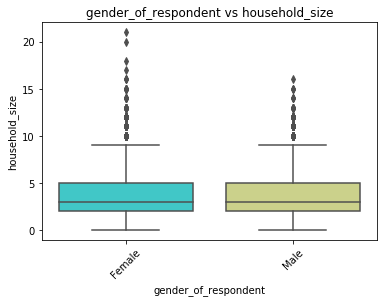

In [49]:
#the plot suggests that there was no big variance in the number of males and females with regard to the household size
sns.boxplot(x='gender_of_respondent',y='household_size',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs household_size')


Text(0.5, 1.0, 'marital_status vs age of respondent')

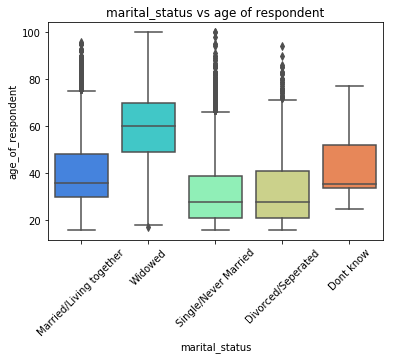

In [50]:
#
sns.boxplot(x='marital_status',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('marital_status vs age of respondent')


Text(0.5, 1.0, 'job_type vs household size')

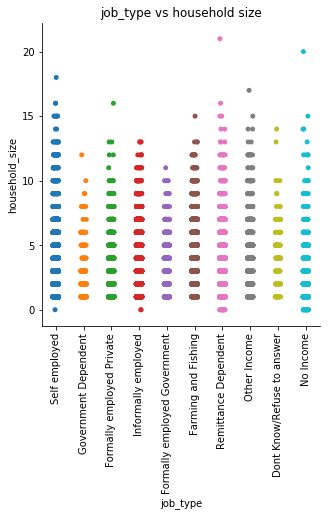

In [51]:
#this plot suggests that most of the respondents were self employed in this jobtype category
sns.catplot(x="job_type", y="household_size", data=df)
plt.xticks(rotation = 90)
plt.title('job_type vs household size')


MULTIVARIATE ANALYSIS

In [0]:
#multiple regression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [0]:
#From our dataset we to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets.
X = df.iloc[:, 2:11]
y = df.iloc[:, 1]

In [0]:
#because the data is categorical we have to make them in aa form that we can run a regression model on it
X=pd.get_dummies(X)

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [56]:
X.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
X.shape

(23524, 36)

In [0]:
#the following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# We now need to perform feature scaling. We execute the following code to do so:
# this is components are sensitive to scale of measurements so we need to standardize our dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
#we want to check if there is a relationship between the variables and also the strength of the relationship
X.corr()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
household_size,1.000000,-0.119212,0.274017,-0.274017,-0.098726,0.098726,-0.011329,0.011329,0.204270,-0.243698,0.021011,0.013798,0.042370,0.108263,-0.129416,-0.008536,0.345770,-0.182788,-0.153418,0.002008,-0.007311,0.004614,-0.024692,0.104180,-0.095932,-0.023203,0.024107,0.188149,0.002773,-0.071118,-0.045911,0.013800,-0.065799,0.062540,0.008988,-0.163918
age_of_respondent,-0.119212,1.000000,0.047508,-0.047508,0.103758,-0.103758,-0.013123,0.013123,-0.302048,0.419421,-0.078538,-0.134724,-0.196217,-0.111259,-0.119497,0.005260,0.054198,-0.296593,0.461496,0.024000,0.359671,0.009449,-0.071641,-0.209862,-0.090700,-0.037003,-0.002777,0.153382,-0.005634,-0.061839,0.171570,-0.088909,-0.060762,-0.014441,-0.057750,0.000237
location_type_Rural,0.274017,0.047508,1.000000,-1.000000,-0.084868,0.084868,0.012281,-0.012281,0.068149,-0.017148,-0.032064,-0.028638,-0.074190,0.026308,-0.023440,-0.008893,0.234800,-0.268019,0.052319,-0.001220,0.090301,-0.008893,0.018154,-0.043799,-0.084807,-0.050856,0.022834,0.346226,-0.047365,-0.068097,0.001962,0.070894,-0.045217,-0.011225,-0.054073,-0.294581
location_type_Urban,-0.274017,-0.047508,-1.000000,1.000000,0.084868,-0.084868,-0.012281,0.012281,-0.068149,0.017148,0.032064,0.028638,0.074190,-0.026308,0.023440,0.008893,-0.234800,0.268019,-0.052319,0.001220,-0.090301,0.008893,-0.018154,0.043799,0.084807,0.050856,-0.022834,-0.346226,0.047365,0.068097,-0.001962,-0.070894,0.045217,0.011225,0.054073,0.294581
cellphone_access_No,-0.098726,0.103758,-0.084868,0.084868,1.000000,-1.000000,0.102115,-0.102115,0.003786,-0.056033,-0.023863,0.030310,0.049116,0.030356,0.028764,-0.005599,-0.157912,0.065754,0.123893,0.011596,0.204348,-0.005599,0.009639,-0.119766,-0.099806,-0.099015,-0.001971,-0.111498,-0.071634,-0.105631,0.058474,0.008630,0.104005,0.006779,0.083016,0.055152
cellphone_access_Yes,0.098726,-0.103758,0.084868,-0.084868,-1.000000,1.000000,-0.102115,0.102115,-0.003786,0.056033,0.023863,-0.030310,-0.049116,-0.030356,-0.028764,0.005599,0.157912,-0.065754,-0.123893,-0.011596,-0.204348,0.005599,-0.009639,0.119766,0.099806,0.099015,0.001971,0.111498,0.071634,0.105631,-0.058474,-0.008630,-0.104005,-0.006779,-0.083016,-0.055152
gender_of_respondent_Female,-0.011329,-0.013123,0.012281,-0.012281,0.102115,-0.102115,1.000000,-1.000000,-0.042925,-0.413223,-0.001170,-0.012238,-0.010867,0.497688,-0.004484,-0.017464,-0.056086,-0.085768,0.219947,0.005245,0.114633,-0.003398,-0.019249,-0.058196,-0.041081,-0.024397,0.006616,0.001094,-0.028923,-0.061431,0.023854,-0.052741,0.073371,0.011221,0.120213,-0.035647
gender_of_respondent_Male,0.011329,0.013123,-0.012281,0.012281,-0.102115,0.102115,-1.000000,1.000000,0.042925,0.413223,0.001170,0.012238,0.010867,-0.497688,0.004484,0.017464,0.056086,0.085768,-0.219947,-0.005245,-0.114633,0.003398,0.019249,0.058196,0.041081,0.024397,-0.006616,-0.001094,0.028923,0.061431,-0.023854,0.052741,-0.073371,-0.011221,-0.120213,0.035647
relationship_with_head

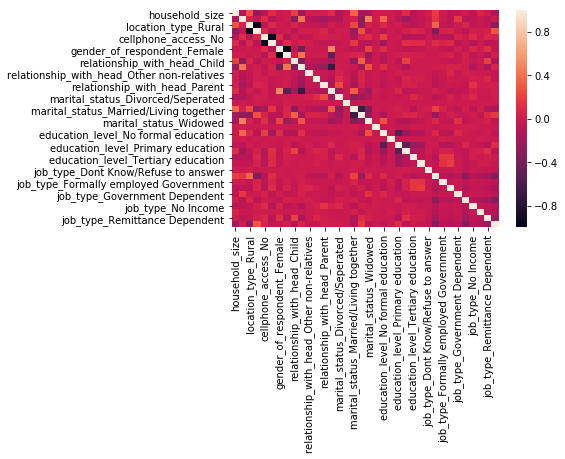

In [61]:
#the heat map below a majority of the variables display very weak relationship with each other.
#but we can try to use multiple regression and see its performance
sns.heatmap(X.corr())

In [0]:
#We then create and train the model by fitting the linear regression model on the training data.
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [0]:
#Grabbing predictions off the test set and see how well it did
predictions = lm.predict(X_test)

In [64]:

X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     268.5
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:21:00   Log-Likelihood:                -5159.0
No. Observations:               23524   AIC:                         1.038e+04
Df Residuals:                   23494   BIC:                         1.062e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0831      0.009      8.862      0.0

In [0]:
#this model is not appropriate for modelling this kind of data. having assumed that there exists a linear relationship the relationship is too weak and absent in most variables 
#therefore yields a very poor model looking at the rsquared and adjusted -squared 

**Principal Component Analysis**

In [0]:
#we can also try pca to do some reduction on out dataset
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Using  Principal Component we set the threshhold of 95%
# Let's first try to use  principal component to reduce our dataset by picking the items with the largest variance, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [68]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[3983   23]
 [ 592  107]]
0.869287991498406


In [0]:
#from the above methods we attained an accuracy of 86%
#much as our data was sufficient we cant give a conclusion because looking at the confusion matrix we cannot make any reasonable conclusion.
#this then leads us to try and use a different method in this case Logistic Regression as the results we expect are binary in nature

**Challenging our model using Logistic regression**

In [0]:
#we want to use logistic regression to check whether we can get better results.
#following the assumptions of logistic regression that are known to us namely
#Binary logistic regression requires the dependent variable to be binary.(Our dataset meets this condition)
#For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.(we already did the conversions to dummy variable)
#Only the meaningful variables should be included.this is done by th use of PCA
#The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#this is evident in our correlation table above
#Logistic regression requires quite large sample sizes.(our data is sufficient as it has volume)

In [72]:
#we therefore proceed to import our logistic regression
#we then fit our logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [74]:
#we can import confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5890  146]
 [ 686  336]]


In [75]:
#we evaluate our model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      6036
           1       0.70      0.33      0.45      1022

    accuracy                           0.88      7058
   macro avg       0.80      0.65      0.69      7058
weighted avg       0.87      0.88      0.86      7058



In [0]:
#Interpretation: Of the entire test set, 86% of the respondents were likely to have accounts.